In [202]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [203]:
f=open('SIH.txt','r',encoding='utf-8')

In [204]:
data=f.read()

In [205]:
print(data)

28/08/25, 1:14 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
28/08/25, 1:13 pm - Jay Rathore Svvv created group "AIH Group "
28/08/25, 1:13 pm - Jay Rathore Svvv added you
28/08/25, 2:51 pm - Jay Rathore Svvv changed the group name from "AIH Group " to "SIH Group"
29/08/25, 7:14 am - Garvit Hindoliya: Out of 100k+ students, I was fortunate to be among the Top 95 finalists, and the biggest part isss...

Our team made it to the Top 6 overall & Top 2 for our problem statement!

Problem Statement: Precision Farming Advisor

Our Solution: AgriShakti - An Al-powered Crop Health & Advisory Platform

Key Features Implemented

Crop Health Monitoring

Soil Analyzer

Crop Planner

Weather Intelligence

Mandi Price Integration

Farmer-Friendly Dashboard
30/08/25, 10:46 am - Nikhil Bhardeja Svvv: bhailog problem statement 81 dekha hai mene <This message was edited>
30/08/25, 10:47 am - Nikhil Bhardeja Svvv: usme travel rel

In [206]:
def is_12_hour_format(data: str) -> bool:
    """Returns True if the chat text uses 12-hour time format, else False."""
    # WhatsApp sometimes uses \u202f (narrow non-breaking space) before am/pm
    cleaned_data = data.replace('\u202f', ' ').lower()
    print(bool(re.search(r'\b(am|pm)\b', cleaned_data)))

is_12_hour_format(data)

True


In [207]:
print(type(data))

<class 'str'>


In [208]:
# pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s-\s'
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s?(?:am|pm|AM|PM)?\s-\s'

In [209]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 'Jay Rathore Svvv created group "AIH Group "\n',
 'Jay Rathore Svvv added you\n',
 'Jay Rathore Svvv changed the group name from "AIH Group " to "SIH Group"\n',
 'Garvit Hindoliya: Out of 100k+ students, I was fortunate to be among the Top 95 finalists, and the biggest part isss...\n\nOur team made it to the Top 6 overall & Top 2 for our problem statement!\n\nProblem Statement: Precision Farming Advisor\n\nOur Solution: AgriShakti - An Al-powered Crop Health & Advisory Platform\n\nKey Features Implemented\n\nCrop Health Monitoring\n\nSoil Analyzer\n\nCrop Planner\n\nWeather Intelligence\n\nMandi Price Integration\n\nFarmer-Friendly Dashboard\n',
 'Nikhil Bhardeja Svvv: bhailog problem statement 81 dekha hai mene <This message was edited>\n',
 'Nikhil Bhardeja Svvv: usme travel related user  info lena hai  aur recommendations dene hain\n',
 'Nikhil Bhardeja Svvv: 

In [210]:
dates=re.findall(pattern,data)
dates

['28/08/25, 1:14\u202fpm - ',
 '28/08/25, 1:13\u202fpm - ',
 '28/08/25, 1:13\u202fpm - ',
 '28/08/25, 2:51\u202fpm - ',
 '29/08/25, 7:14\u202fam - ',
 '30/08/25, 10:46\u202fam - ',
 '30/08/25, 10:47\u202fam - ',
 '30/08/25, 10:47\u202fam - ',
 '30/08/25, 10:48\u202fam - ',
 '30/08/25, 10:48\u202fam - ',
 '30/08/25, 10:49\u202fam - ',
 '30/08/25, 10:49\u202fam - ',
 '30/08/25, 10:50\u202fam - ',
 '30/08/25, 10:50\u202fam - ',
 '30/08/25, 10:51\u202fam - ',
 '31/08/25, 2:44\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:04\u202fpm - ',
 '31/08/25, 9:05\u202fpm - ',
 '31/08/25, 9:06\u202fpm - ',
 '31/08/25, 9:18\u202fpm - ',
 '31/08/25, 9:18\u202fpm - ',
 '31/08/25, 9:22\u202fpm - ',
 '31/08/25, 9:30\u202fpm - ',
 '31/08/25, 9:31\u202fpm - ',
 '01/09/25, 7:02\u202fpm - ',
 '01/09/25, 7:03\u202fpm - ',


In [211]:
df=pd.DataFrame({'user_message':messages, 'date':dates})
df['date'] = df['date'].astype(str).str.replace('\u202f', ' ', regex=False)

# df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y, %H:%M - ')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %I:%M %p - ')
df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2025-08-28 13:14:00
1,"Jay Rathore Svvv created group ""AIH Group ""\n",2025-08-28 13:13:00
2,Jay Rathore Svvv added you\n,2025-08-28 13:13:00
3,"Jay Rathore Svvv changed the group name from ""...",2025-08-28 14:51:00
4,"Garvit Hindoliya: Out of 100k+ students, I was...",2025-08-29 07:14:00


In [212]:
df.shape

(1044, 2)

In [213]:
#seperate user name and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

df.head(8)
        

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16512\3722420200.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry=re.split('([\w\W]+?):\s',message)


,date,user,message
0,2025-08-28 13:14:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2025-08-28 13:13:00,group_notification,"Jay Rathore Svvv created group ""AIH Group ""\n"
2,2025-08-28 13:13:00,group_notification,Jay Rathore Svvv added you\n
3,2025-08-28 14:51:00,group_notification,"Jay Rathore Svvv changed the group name from ""..."
4,2025-08-29 07:14:00,Garvit Hindoliya,
5,2025-08-30 10:46:00,Nikhil Bhardeja Svvv,bhailog problem statement 81 dekha hai mene <T...
6,2025-08-30 10:47:00,Nikhil Bhardeja Svvv,usme travel related user info lena hai aur r...
7,2025-08-30 10:47:00,Nikhil Bhardeja Svvv,toh sab ek baar dekh ke bata do\n


In [214]:
#seperating year,day,date,hour,minute
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [215]:
# df.drop(columns=['date'],inplace=True)
df.head()



,date,user,message,year,month,day,hour,minute
0,2025-08-28 13:14:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,August,28,13,14
1,2025-08-28 13:13:00,group_notification,"Jay Rathore Svvv created group ""AIH Group ""\n",2025,August,28,13,13
2,2025-08-28 13:13:00,group_notification,Jay Rathore Svvv added you\n,2025,August,28,13,13
3,2025-08-28 14:51:00,group_notification,"Jay Rathore Svvv changed the group name from ""...",2025,August,28,14,51
4,2025-08-29 07:14:00,Garvit Hindoliya,,2025,August,29,7,14


In [216]:
df['user'].unique().tolist()



['group_notification',
 'Garvit Hindoliya',
 'Nikhil Bhardeja Svvv',
 'Anushka',
 'Jitendra Svvv',
 'Jay Rathore Svvv',
 'Khushi Uikey Svvv',
 'Sanskrati Svvv',
 '+91 97535 64070']

In [217]:
words=[]
for i in df['message']:
    words.extend(i.split())
print(len(words))

6281


In [218]:
df[df['message']=="<Media omitted>\n"].shape[0]



82

In [219]:
from urlextract import URLExtract
extract = URLExtract()
links = []
for message in df['message']:
    links.extend(extract.find_urls(message))
print(len(links))

24


In [220]:
df[df['user']=='Nikhil'].shape

(0, 8)

In [221]:
df['user'].value_counts().head()

user
Jay Rathore Svvv        298
Nikhil Bhardeja Svvv    264
Sanskrati Svvv          196
Garvit Hindoliya        174
+91 97535 64070          51
Name: count, dtype: int64

In [222]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'count': 'Percent', 'user': 'Name'})

,Name,Percent
0,Jay Rathore Svvv,28.54
1,Nikhil Bhardeja Svvv,25.29
2,Sanskrati Svvv,18.77
3,Garvit Hindoliya,16.67
4,+91 97535 64070,4.89
5,Jitendra Svvv,2.49
6,Anushka,1.82
7,group_notification,1.44
8,Khushi Uikey Svvv,0.10


In [223]:
import emoji
from collections import Counter
emojies=[]
for i in df['message']:
    emojies.extend([c for c in i if emoji.is_emoji(c)])
print(emojies)

emoji_df = pd.DataFrame(Counter(emojies).most_common(len(Counter(emojies))))
emoji_df

['🌚', '😂', '🫡', '❄', '😂', '😒', '👍', '🙏', '🙏', '🏻', '🌚', '😑', '🙏', '😅', '😅', '🙏', '😐', '🥲', '🙃', '😕', '😕', '😑', '😀', '😐', '🥲', '😄', '😂', '😅', '😭', '🙏', '🏻', '🤓', '👆', '🏻', '😂', '😄', '😅', '🤓', '👆', '🏻', '😅', '😭', '😂', '😅', '🤗', '✌', '😂', '😂', '😅', '🙏', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😝', '😂', '😭', '😄', '❄', '😄', '❄', '❄', '❤', '🎉', '🥳', '✨', '✨', '🥳', '🎂', '✨', '❄', '❄', '😑', '🥲']


,0,1
0,😂,16
1,😅,7
2,❄,6
3,🙏,6
4,🏻,4
5,😄,4
6,😑,3
7,🥲,3
8,😭,3
9,✨,3


In [224]:
# Convert month name to month number
df['month_num'] = pd.to_datetime(df['month'], format='%B').dt.month
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

timeline['time']=time
timeline



,year,month_num,month,message,time
0,2025,8,August,31,August-2025
1,2025,9,September,871,September-2025
2,2025,10,October,142,October-2025


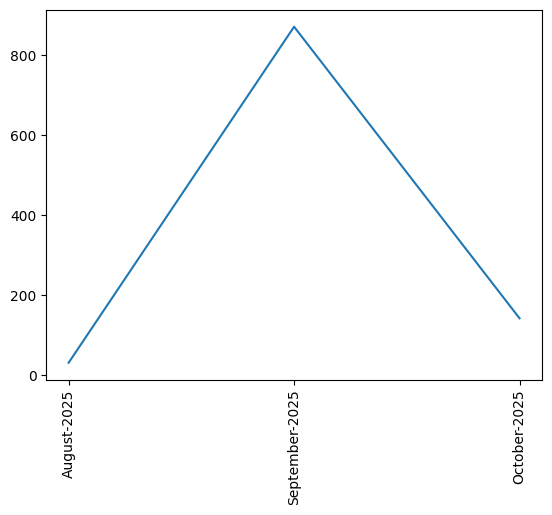

In [225]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

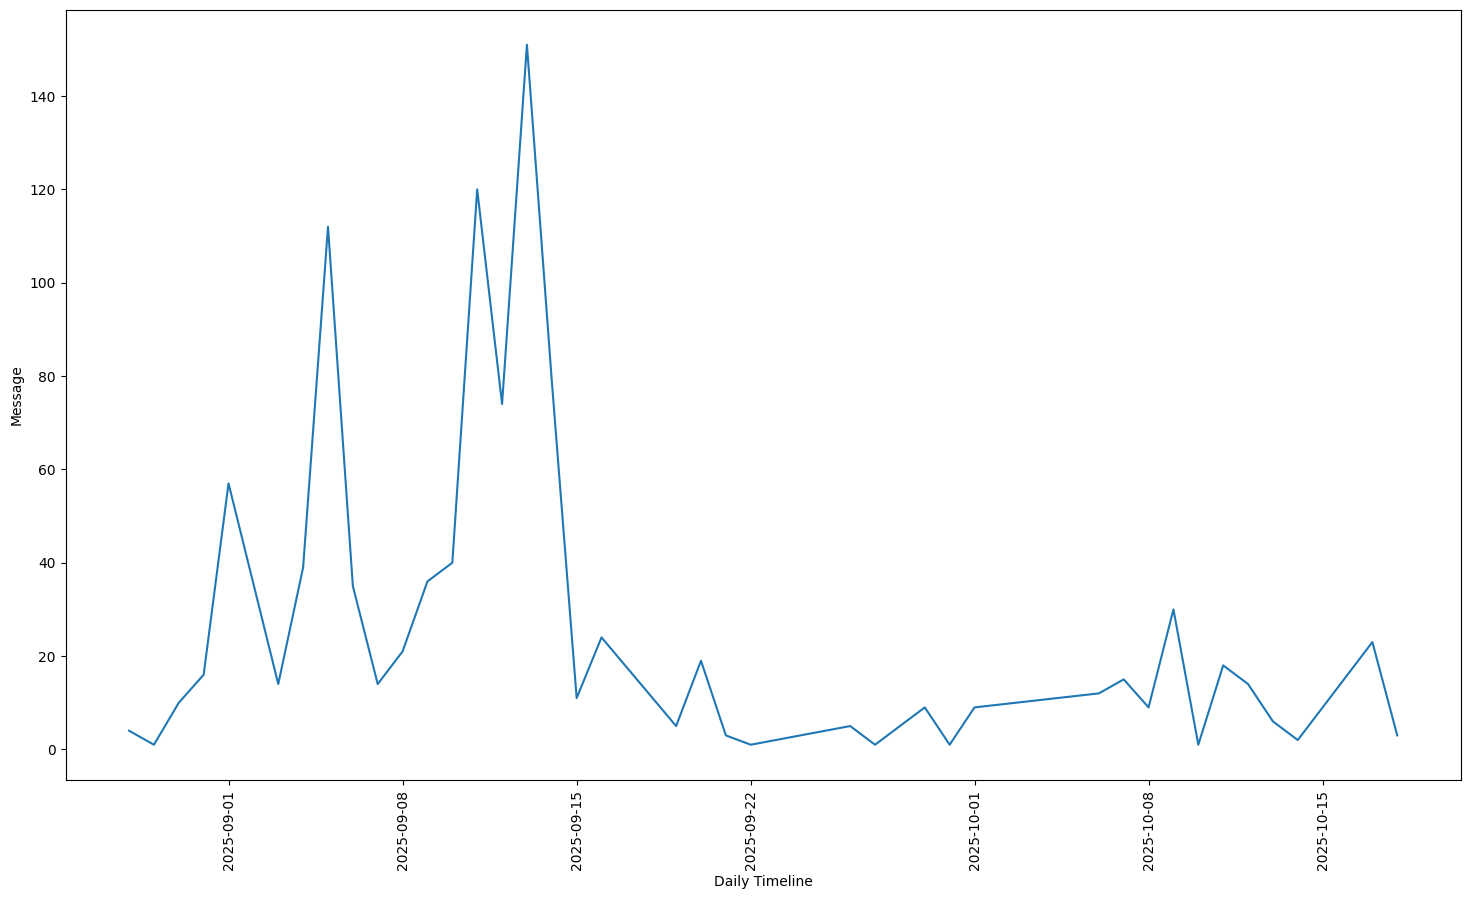

In [226]:
df['only_date']=df['date'].dt.date
daily_timeline=df.groupby('only_date').count()['message'].reset_index()
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xlabel("Daily Timeline")
plt.ylabel("Message")
plt.xticks(rotation=90)
plt.show()

In [227]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2025-08-28 13:14:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,August,28,13,14,8,2025-08-28
1,2025-08-28 13:13:00,group_notification,"Jay Rathore Svvv created group ""AIH Group ""\n",2025,August,28,13,13,8,2025-08-28
2,2025-08-28 13:13:00,group_notification,Jay Rathore Svvv added you\n,2025,August,28,13,13,8,2025-08-28
3,2025-08-28 14:51:00,group_notification,"Jay Rathore Svvv changed the group name from ""...",2025,August,28,14,51,8,2025-08-28
4,2025-08-29 07:14:00,Garvit Hindoliya,,2025,August,29,7,14,8,2025-08-29


In [228]:
df['day_name']=df['date'].dt.day_name()
df['day_name'].value_counts()
df['month'].value_counts()

month
September    871
October      142
August        31
Name: count, dtype: int64

In [229]:
df['hour']

0       13
1       13
2       13
3       14
4        7
        ..
1039    17
1040    18
1041    13
1042    14
1043    16
Name: hour, Length: 1044, dtype: int32

In [230]:
for hour in df[['day_name','hour']]['hour']:
    print(hour)

13
13
13
14
7
10
10
10
10
10
10
10
10
10
10
14
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
15
21
21
21
21
21
21
21
21
21
21
21
22
22
8
8
8
8
8
8
8
10
10
10
10
10
10
10
11
12
12
12
15
15
15
15
15
15
17
18
19
19
19
19
19
19
19
19
19
19
19
19
19
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
16
16
17
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
17
17
17
17
17
17
17
18
19
19
19
19
19
19
7
7
8
8
8
8
8
19
19
19
19
19
21
22
22
22
22
22
22
22
22
7
8
8
8
8
9
12
18
19
19
19
20
20
20
20
21
21
21
2

In [231]:
df[df['user']=='Anushka']['message']

15    https://www.linkedin.com/posts/gaus-mohiuddin-...
26    Health care me to kuch innovative kya Dal sakt...
27    Doctor se video call krwa de ya to kya kr sakt...
28    Isme hum trains  ka data  uthayenge na instruc...
30                                                 Ha\n
34      WebGL or unity nhi aata mujhe three js aata h\n
40                         Nhi phir to koi mtlb nhi h\n
41                                                 Ha\n
42               Abhi submission hue hi nhi h kisi me\n
45    Ye topics bohot sare pechli bar bhi the uska b...
51                          Aaj ke aaj me 500 ho gaye\n
54                                       Kal to 0 the\n
57                      2024 ka dekh liya Shayad tune\n
59                          Group Wali link hi kholna\n
77                                    <Media omitted>\n
79                                        Call pe bol\n
82                            network thik kr ke aayi\n
83                                   group pe li

In [232]:
a=df['user'].unique().tolist()
try:
    a.remove('group_notification')
except ValueError:
    pass  # ignore if not present
print(a)

['Garvit Hindoliya', 'Nikhil Bhardeja Svvv', 'Anushka', 'Jitendra Svvv', 'Jay Rathore Svvv', 'Khushi Uikey Svvv', 'Sanskrati Svvv', '+91 97535 64070']


In [249]:
df['user'].value_counts()
df[df['message'].groupby(df['user']).transform('count') >= 5]


,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2025-08-28 13:14:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,August,28,13,14,8,2025-08-28,Thursday
1,2025-08-28 13:13:00,group_notification,"Jay Rathore Svvv created group ""AIH Group ""\n",2025,August,28,13,13,8,2025-08-28,Thursday
2,2025-08-28 13:13:00,group_notification,Jay Rathore Svvv added you\n,2025,August,28,13,13,8,2025-08-28,Thursday
3,2025-08-28 14:51:00,group_notification,"Jay Rathore Svvv changed the group name from ""...",2025,August,28,14,51,8,2025-08-28,Thursday
4,2025-08-29 07:14:00,Garvit Hindoliya,,2025,August,29,7,14,8,2025-08-29,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1039,2025-10-17 17:23:00,Jitendra Svvv,Haa wahi bana raha tha\n,2025,October,17,17,23,10,2025-10-17,Friday
1040,2025-10-17 18:50:00,Nikhil Bhardeja Svvv,@⁨Sanskrati Svvv⁩ backend start Kiya kya?\n,2025,October,17,18,50,10,2025-10-17,Friday
1041,2025-10-18 13:43:00,Sanskrati Svvv,Haa start krdiya\n,2025,October,18,13,43,10,2025-10-18,Saturday
1042,2025-10-18 14:09:00,Nikhil Bhardeja Svvv,repo ki link kar dena mujhe\n,2025,October,18,14,9,10,2025-10-18,Saturday


In [259]:
a=df[df['user']=='Anushka']
emojies=["df"]
for i in a:
    emojies.extend([c for c in i if emoji.is_emoji(c)])


if(len(emojies) == 0):
    print("hh")
else:
    print("fadf")

fadf
